TFid(term frequency-inverse document frequency): It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is used as a weighting factor in information retrieval and text mining. A higher the frequency of the word, the less important it is(hence the inverse)

   """ 1: unreliable news/fake news
    0: reliable/real news"""

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
#Stemmers remove morphological affixes from words, leaving only the word stem.
from nltk.stem.porter import PorterStemmer

#convert text into feature vectors (numerical data)
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

#model
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics  import accuracy_score




In [19]:
stopwordslist=stopwords.words('english')

Pre Processing

In [3]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    plt.subplots(figsize=(8,6))
    plt.xticks(rotation=90)
    sns.barplot(x=ms.index, y=ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

In [4]:
newsdf=pd.read_csv('train.csv')

In [5]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
#check for null
newsdf.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

,Total,Percent
author,1957,9.408654
title,558,2.682692
text,39,0.187500


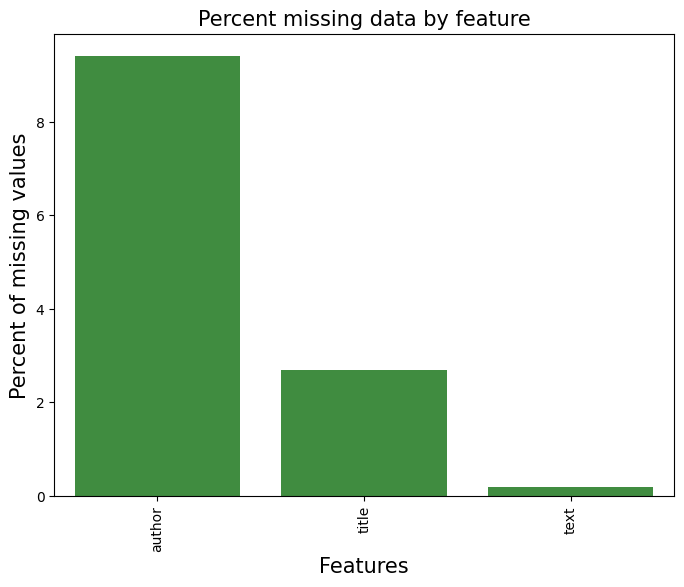

In [7]:
#insignificant so will replace nulls with empty str
missingdata(newsdf)

In [8]:
newsdf=newsdf.fillna(" ")

In [9]:
#check if no more null
newsdf.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
newsdf.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [11]:
newsdf.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [12]:
# combining author and title: the combined will be my X
newsdf['content']=newsdf['title']+" "+newsdf['author']

In [13]:
#Checking if author merge into title properly
newsdf['content'].loc[1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart Daniel J. Flynn'

Stemming : root word
>>> plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
...            'died', 'agreed', 'owned', 'humbled', 'sized',
...            'meeting', 'stating', 'siezing', 'itemization',
...            'sensational', 'traditional', 'reference', 'colonizer',
...            'plotted']

>>> singles = [stemmer.stem(plural) for plural in plurals]



In [15]:
stemmer = PorterStemmer()
def stemming(content):
    #remove everything except alphabets
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)

    #convert all to lower so wont confuse model
    stemmed_content = stemmed_content.lower()
    
    #creating a list
    stemmed_content = stemmed_content.split()

    #As per nltk doc
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwordslist]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

#stemming content col
newsdf['content'] = newsdf['content'].apply(stemming)

In [20]:
newsdf.head(2)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbar...


Convert text data into numerical

In [23]:

textualdata=newsdf['content']

In [24]:
#TFid counts the freq of a words and adds a number to it (see definition above)
vectorizer = TfidfVectorizer()

In [31]:
# "numerical"
feature_vectors=vectorizer.fit_transform(textualdata)

In [32]:
print(feature_vectors)

  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (1, 3568)	0.26373768806048464
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.2954204

Splitting into labels and results

In [33]:
#Labels in X
X=feature_vectors
#results in Y
Y=newsdf['label']

In [36]:
#Stratify allow equal distribution of fake/real news

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,train_size=0.9,stratify=Y,random_state=2)

In [51]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (18720, 17128)
X_test shape: (2080, 17128)
Y_train shape: (18720,)
Y_test shape: (2080,)


Model Time!!!!!

In [48]:
model=LogisticRegression()

In [49]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaulation

In [57]:

#returns a value between 0 and 1, where 1 indicates perfect accuracy (all predictions are correct) 
#and 0 indicates no accuracy (all predictions are incorrect).
train_scores=model.predict(X_train)
train_accuracy_score=accuracy_score(train_scores,Y_train)
print(f"Training Data Accuracy Score: {train_accuracy_score}")

Training Data Accuracy Score: 0.9877670940170941


In [58]:
test_scores=model.predict(X_test)
test_accuracy_score=accuracy_score(test_scores,Y_test)
print(f"Test Data Accuracy Score: {test_accuracy_score}")

Test Data Accuracy Score: 0.979326923076923


Prediction System

In [72]:
# Sample Data:

# first row
new=X_test[0]
prediction=model.predict(new)
if prediction[0]==0:
    print("It is reliable/real news")
else:
    print("It is not reliable/fake news")

It is reliable/real news


In [80]:
# This also returns 0
Y_test.values[0]

0

In [81]:
testdf=pd.read_csv("test.csv")

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
